In [28]:
from tensorflow.keras import layers,models
import tensorflow as tf

def create_mlp(input_size,hidden_sizes,output_size):
    model=models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_size,)))
    for hidden_size in hidden_sizes:
        model.add(layers.Dense(hidden_size,activation="relu"))
    model.add(layers.Dense(output_size,activation="softmax"))
    return model
if __name__=="__main__":
    input_size=10
    hidden_sizes=[64,32]
    output_size=2
    mlp_model=create_mlp(input_size,hidden_sizes,output_size)
    mlp_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                704       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2850 (11.13 KB)
Trainable params: 2850 (11.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
import numpy as np

class simpleperceptron:
    def __init__(self,input_size,hidden_size,output_size):
        self.weights_input_hidden=np.random.rand(input_size,hidden_size)
        self.bias_hidden=np.zeros((1,hidden_size))
        
        self.weights_hidden_output=np.random.rand(hidden_size,output_size)
        self.bias_output=np.zeros((1,output_size))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self,x):
        return x * (1 - x)
    
    def forward(self,inputs):
        self.hidden_layer_activation=self.sigmoid(np.dot(inputs,self.weights_input_hidden) + self.bias_hidden)
        self.output_layer_activation=self.sigmoid(np.dot(self.hidden_layer_activation,self.weights_hidden_output) + self.bias_output)
        
        return self.output_layer_activation
    
    def backward(self,inputs,targets,learning_rate):
        output_layer_error=targets - self.output_layer_activation
        output_layer_delta=output_layer_error * self.sigmoid_derivative(self.output_layer_activation)
        
        input_layer_error=output_layer_delta.dot(self.weights_hidden_output.T)
        input_layer_delta=input_layer_error* self.sigmoid_derivative(self.hidden_layer_activation)
        
    def train(self,inputs,targets,epochs,learning_rate):
        for epoch in range(epochs):
            for i in range(len(inputs)):
                input_data=np.array([inputs[i]])
                target_data=np.array([targets[i]])
                output=self.forward(input_data)
                self.backward(input_data,target_data,learning_rate)
                
            if epoch % 100 == 0:
                mse=np.mean(np.square(targets - self.forward(inputs)))
                print(f"Epoch {epoch} , Mean Squarred Error : {mse}")
                
if __name__=="__main__":
    inputs=np.array([[0,0],[0,1],[1,0],[1,1]])
    targets=np.array([[0],[1],[1],[0]])
    model=simpleperceptron(input_size=2,hidden_size=4,output_size=1)
    model.train(inputs,targets,epochs=1000,learning_rate=0.1)
    test_inputs=np.array([[0,0],[0,1],[1,0],[1,1]])
    predictions=model.forward(test_inputs)
    print("Predictions :\n",predictions)

Epoch 0 , Mean Squarred Error : 0.32747875070267596
Epoch 100 , Mean Squarred Error : 0.32747875070267596
Epoch 200 , Mean Squarred Error : 0.32747875070267596
Epoch 300 , Mean Squarred Error : 0.32747875070267596
Epoch 400 , Mean Squarred Error : 0.32747875070267596
Epoch 500 , Mean Squarred Error : 0.32747875070267596
Epoch 600 , Mean Squarred Error : 0.32747875070267596
Epoch 700 , Mean Squarred Error : 0.32747875070267596
Epoch 800 , Mean Squarred Error : 0.32747875070267596
Epoch 900 , Mean Squarred Error : 0.32747875070267596
Predictions :
 [[0.74239839]
 [0.78203555]
 [0.79173133]
 [0.81723637]]


In [31]:
z={}

def union(A,B):
    for x in A and B:
        z[x]=max(A[x],B[x])
    return z

def intersection(A,B):
    for x in A and B:
        z[x]=min(A[x],B[x])
    return z

def compliment(X):
    for x in X:
        z[x]=round(1 - X[x],2)
    return z

def algebraic_sum(A,B):
    for x in A and B:
        z[x]=round((A[x]+B[x]-A[x]*B[x]),2)
    return z

def algebraic_product(A,B):
    for x in A and B:
        z[x]=round((A[x]*B[x]),2)
    return z
def bounded_sum(A,B):
    for x in A and B:
        z[x]=round(min(1,A[x]+B[x]),2)
    return z
def bounded_difference(A,B):
    for x in A and B:
        z[x]=round(max(0,B[x]-A[x]),2)

    return z

def get_membership_value(key):
    while True:
        value=float(input("\nEnter the membership value (between 0 and 1) for "+key+" : "))
        
        if 0<= value <=1:
            return value
        else:
            print("\nInvalid input! Enter input between 0 and 1! ")

A={}
B={}

n=int(input("\nEnter the number of elements : "))
for _ in range(n):
    key=input("\nEnter crispy set elements : ")
    value=get_membership_value(key)
    A[key]=value
    value=get_membership_value(key)
    B[key]=value
    
print(f"\n{A=} UNION {B=} =>\t{union(A,B)}")
print(f"\n{A=} INTERSECTION {B=} =>\t{intersection(A,B)}")
print(f"\nCOMPLIMENT OF {A=} =>\t{compliment(A)}")
print(f"\nCOMPLIMENT OF {B=} =>\t{compliment(B)}")
print("Algebraic Sum : ",algebraic_sum(A,B))
print("Algebraic product : ",algebraic_product(A,B))
print("Bounded Sum : ",bounded_sum(A,B))
print("Bounded difference: ",bounded_difference(A,B))


Enter the number of elements : 3

Enter crispy set elements : a

Enter the membership value (between 0 and 1) for a : 0.2

Enter the membership value (between 0 and 1) for a : 0.3

Enter crispy set elements : b

Enter the membership value (between 0 and 1) for b : 0.5

Enter the membership value (between 0 and 1) for b : 0.7

Enter crispy set elements : c

Enter the membership value (between 0 and 1) for c : 0.3

Enter the membership value (between 0 and 1) for c : 0.4

A={'a': 0.2, 'b': 0.5, 'c': 0.3} UNION B={'a': 0.3, 'b': 0.7, 'c': 0.4} =>	{'a': 0.3, 'b': 0.7, 'c': 0.4}

A={'a': 0.2, 'b': 0.5, 'c': 0.3} INTERSECTION B={'a': 0.3, 'b': 0.7, 'c': 0.4} =>	{'a': 0.2, 'b': 0.5, 'c': 0.3}

COMPLIMENT OF A={'a': 0.2, 'b': 0.5, 'c': 0.3} =>	{'a': 0.8, 'b': 0.5, 'c': 0.7}

COMPLIMENT OF B={'a': 0.3, 'b': 0.7, 'c': 0.4} =>	{'a': 0.7, 'b': 0.3, 'c': 0.6}
Algebraic Sum :  {'a': 0.44, 'b': 0.85, 'c': 0.58}
Algebraic product :  {'a': 0.06, 'b': 0.35, 'c': 0.12}
Bounded Sum :  {'a': 0.5, 'b': 1, 

In [43]:
z={}

def union(A,B):
    for x in A and B:
        z[x]=max(A[x],B[x])
    return z

def intersection(A,B):
    for x in A and B:
        z[x]=min(A[x],B[x])
    return z
def compliment(X):
    for x in X:
        z[x]=round(1-X[x],2)
    return z
def get_membership(key):
    while True:
        value=float(input("\nEnter the membership value between (0 and 1) for "+key+" : "))
        
        if 0<= value <=1:
            return value
        else:
            print("\nINVALID INPUT!Enter the value between 0 and 1 !")

A={}
B={}
print("Proving De Morgan's Law : ")

n=int(input("\nEnter the number of elements : "))
for _ in range(n):
    key=input("\nEnter the crispy set element : ")
    value=get_membership(key)
    A[key]=value
    value=get_membership(key)
    B[key]=value
    
print(f"\nFUzzy sets are : {A=} and {B=}")
    
LHS=compliment(union(A,B))
RHS=intersection(compliment(A),compliment(B))

if LHS==RHS:
    print(f"\nDe Morgan's law has proved \n Since {LHS} = {RHS}")

Proving De Morgan's Law : 

Enter the number of elements : 3

Enter the crispy set element : a

Enter the membership value between (0 and 1) for a : 0.3

Enter the membership value between (0 and 1) for a : 0.4

Enter the crispy set element : b

Enter the membership value between (0 and 1) for b : 0.1

Enter the membership value between (0 and 1) for b : 0.2

Enter the crispy set element : c

Enter the membership value between (0 and 1) for c : 0.8

Enter the membership value between (0 and 1) for c : 0.9

FUzzy sets are : A={'a': 0.3, 'b': 0.1, 'c': 0.8} and B={'a': 0.4, 'b': 0.2, 'c': 0.9}

De Morgan's law has proved 
 Since {'a': 0.6, 'b': 0.8, 'c': 0.1} = {'a': 0.6, 'b': 0.8, 'c': 0.1}


In [1]:
import numpy as np

def max_min_composition(R,S):
    result=np.zeros((R.shape[0],S.shape[1]))
    
    for i in range(R.shape[0]):
        for j in range(S.shape[1]):
            max_min=0
            
            for k in range(R.shape[1]):
                max_min=max(max_min,min(R[i,k],S[k,j]))
                
            result[i,j]=max_min
    return result

R=np.array([[0.7,0.6],[0.8,0.3]])
S=np.array([[0.8,0.1,0.4],[0.5,0.6,0.7]])

result=max_min_composition(R,S)
print("Result : \n",result)

Result : 
 [[0.7 0.6 0.6]
 [0.8 0.3 0.4]]


Washing Time :  32.88888888888891


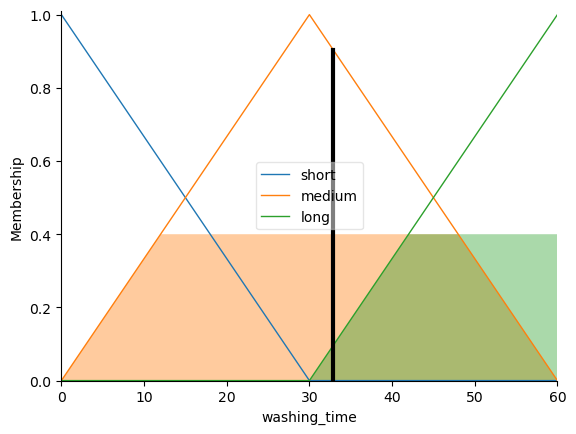

In [51]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

dirtiness=ctrl.Antecedent(np.arange(0,11,1),"dirtiness")
stain_type=ctrl.Antecedent(np.arange(0,11,1),"stain_type")
washing_time=ctrl.Consequent(np.arange(0,61,1),"washing_time")

dirtiness["low"]=fuzz.trimf(dirtiness.universe,[0,0,5])
dirtiness["medium"]=fuzz.trimf(dirtiness.universe,[0,5,10])
dirtiness["high"]=fuzz.trimf(dirtiness.universe,[5,10,10])

stain_type["low"]=fuzz.trimf(stain_type.universe,[0,0,5])
stain_type["medium"]=fuzz.trimf(stain_type.universe,[0,5,10])
stain_type["high"]=fuzz.trimf(stain_type.universe,[5,10,10])

washing_time["short"]=fuzz.trimf(washing_time.universe,[0,0,30])
washing_time["medium"]=fuzz.trimf(washing_time.universe,[0,30,60])
washing_time["long"]=fuzz.trimf(washing_time.universe,[30,60,60])

rule1=ctrl.Rule(dirtiness["low"] & stain_type["low"],washing_time["short"])
rule2=ctrl.Rule(dirtiness["medium"] & stain_type["medium"],washing_time["medium"])
rule3=ctrl.Rule(dirtiness["high"] & stain_type["high"],washing_time["long"])

washing_ctrl=ctrl.ControlSystem([rule1,rule2,rule3])
washing_machine=ctrl.ControlSystemSimulation(washing_ctrl)

if __name__=="__main__":
    washing_machine.input["dirtiness"]=7
    washing_machine.input["stain_type"]=8
    
    washing_machine.compute()
    
    print("Washing Time : ",washing_machine.output["washing_time"])
    
    washing_time.view(sim=washing_machine)

In [6]:
import random

population_size=10
chromosome_length=6
mutation_rate=0.1
target_chromosome="110110"

def generate_population(population_size,chromosome_length):
    return [''.join(random.choice('01') for _ in range (chromosome_length)) for _ in range (population_size)]

def fitness(chromosome):
    return sum(bit==target_bit for bit, target_bit in zip(chromosome, target_chromosome))

def crossover(parent1,parent2):
    crossover_point=random.randint(0,len(parent1) - 1)
    child1=parent1[:crossover_point] + parent2[crossover_point:]
    child2=parent2[:crossover_point] + parent1[crossover_point:]
    
    return child1, child2

def mutate(chromosome,mutation_rate):
    mutated_chromosome=''.join(bit if random.random() > mutation_rate else random.choice('01') for bit in chromosome)
    
    return mutated_chromosome

def select_parents(population):
    parents=random.choices(population,weights=[fitness(chromosome) for chromosome in population],k=2)
    
    return parents[0],parents[1]

def genetic_algorithm(population_size,chromosome_length,mutation_rate,generations):
    population=generate_population(population_size,chromosome_length)
    
    for generation in range(generations):
        fitness_score=[fitness(chromosome) for chromosome in population]
        new_population=[]
        
        for _ in range(population_size // 2):
            parent1,parent2=select_parents(population)
            child1,child2=crossover(parent1,parent2)
            child1=mutate(child1,mutation_rate)
            child2=mutate(child2,mutation_rate)
            
            new_population.extend([child1,child2])
            
        population=new_population
        best_chromosome=max(population, key=fitness)
        print(f"Generation {generation} , best_chromosome - {best_chromosome}, fitness - {fitness(best_chromosome)}")
        
        if fitness(best_chromosome) == len(target_chromosome):
            print("Target chromosome reached !")
            break
            
if __name__=="__main__":
    genetic_algorithm(population_size,chromosome_length,mutation_rate,generations=50)

Generation 0 , best_chromosome - 100110, fitness - 5
Generation 1 , best_chromosome - 111110, fitness - 5
Generation 2 , best_chromosome - 100110, fitness - 5
Generation 3 , best_chromosome - 100110, fitness - 5
Generation 4 , best_chromosome - 100110, fitness - 5
Generation 5 , best_chromosome - 110110, fitness - 6
Target chromosome reached !


In [49]:
import numpy as np

def objective_function(x):
    return x**2

population_size=50
generations=100
mutation_rate=0.1

population=np.random.uniform(-10,10,size=population_size)

for generation in range(generations):
    fitness=objective_function(population)
    
    sorted_indices=np.argsort(fitness)[::-1]
    selected_population=population[sorted_indices[:population_size]]
    
    crossover_population=np.random.choice(selected_population,size=population_size)
    
    mutation_mask=np.random.rand(population_size) > mutation_rate
    mutation_population=np.random.uniform(-1,1,size=population_size)
    crossover_population[mutation_mask] += mutation_population[mutation_mask]
    
    population=crossover_population
    
    best_individual_index=np.argmax(objective_function(population))
    best_x=population[best_individual_index]
    
print(f"Optimal x : {best_x}")
print(f"Optimal f(x) : {objective_function(best_x)}")

Optimal x : -15.054411405356227
Optimal f(x) : 226.63530276171966


In [58]:
import numpy as np

def objective_function(x):
    return -x**2 + 4*x -4
    
population_size=50
generations=100
mutation_rate=0.1

population=np.random.uniform(-10,10,size=population_size)

for generation in range(generations):
    fitness=objective_function(population)
    
    sorted_indices=np.argsort(fitness)[::-1]
    selected_population=population[sorted_indices[:population_size]]
    
    crossover_population=np.random.choice(selected_population,size=population_size)
    
    mutation_mask=np.random.rand(population_size) > mutation_rate
    mutation_population=np.random.uniform(-1,1,size=population_size)
    crossover_population[mutation_mask] += mutation_population[mutation_mask]
    
    population=crossover_population
    
    best_individual_index=np.argmax(objective_function(population))
    best_x=population[best_individual_index]

print(f"Optimal x : {best_x}")
print(f"Optimal f(x) : {objective_function(best_x)}")

Optimal x : 2.1185442493791307
Optimal f(x) : -0.014052739060861796


In [60]:
from tensorflow.keras import models,layers

def create_mlp(input_size,hidden_sizes,output_size):
    model=models.Sequential()
    
    model.add(layers.InputLayer(input_shape=(input_size,)))
    
    for hidden_size in hidden_sizes:
        model.add(layers.Dense(hidden_size,activation="relu"))
        
    model.add(layers.Dense(output_size,activation="softmax"))
    
    return model

if __name__=="__main__":
    input_size=10
    hidden_sizes=[64,32]
    output_size=2
    
    mlp_model=create_mlp(input_size,hidden_sizes,output_size)
    mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2850 (11.13 KB)
Trainable params: 2850 (11.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
